# Introduction

The film industry is a highly competitive and dynamic market where the success of a movie is determined by its box office revenue. Understanding the factors contributing to a movie's financial success is crucial for filmmakers, production companies, and investors. In this report, we present a project to predict movie box office revenue based on various features extracted from a dataset. These features include budget, genres, language, popularity, runtime, vote average, and vote count.

The primary objective of this project is to identify the feature that exhibits the strongest correlation with revenue. By analyzing the relationship between each feature and the box office performance of movies, we aim to uncover the key drivers of financial success in the film industry. This knowledge will enable stakeholders to make informed decisions when planning and producing movies, potentially leading to more profitable outcomes.

Additionally, we seek to evaluate the performance of multiple classifiers in predicting movie revenue. By employing various machine learning algorithms and models, we can compare their predictive accuracies and determine the most effective approach for revenue prediction. This analysis will assist in identifying the classifier that yields the highest accuracy, providing valuable insights into the methodology that best captures the complex relationship between movie features and box office revenue.

Furthermore, hyperparameters play a critical role in the performance of machine learning models. Therefore, another essential goal of this project is to determine the optimal values for the hyperparameters of the selected classifiers. Through continuous adjustment and fine-tuning of these parameters, we aim to enhance the predictive power of the models and maximize their accuracy in forecasting movie revenue.

By achieving these three main objectives, we aim to contribute to the field of film industry analysis and provide practical insights for professionals in the movie business. The findings of this project can guide decision-making processes, allowing stakeholders to allocate resources effectively, select appropriate genres and languages, and optimize other vital factors to increase the likelihood of financial success for future movie projects.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

# Data Preprocessing

In this step, we transform the raw data to an useful data form.

## Data Checking

We wil check the raw data content here, the folloing list are data info and data first 5 instance.

In [4]:
movie=pd.read_csv('movie_dataset.csv')
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [5]:
movie.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


## Data Transforming

In this step, we drop unuseful column, turn genre into mutiple data column, and choose 20000000 revenue as an acceptable criteria, if higher than criteria is 1, otherwise is 0. Also we manualy changed some value to binary form for fitting the classifier later.

In [6]:
# droping unuseful column
newmovie = movie.drop(['homepage','id','keywords','original_title','overview','production_companies','production_countries','release_date','status','tagline','title',
        'spoken_languages','cast','crew','director','genres'],axis=1)
newmovie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              4803 non-null   int64  
 1   budget             4803 non-null   int64  
 2   original_language  4803 non-null   object 
 3   popularity         4803 non-null   float64
 4   revenue            4803 non-null   int64  
 5   runtime            4801 non-null   float64
 6   vote_average       4803 non-null   float64
 7   vote_count         4803 non-null   int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 300.3+ KB


In [7]:
# sub dividing genre into mutiple columns and make it as a dataframe matrix
genres = movie['genres'].copy()
movie['genres'] = movie['genres'].astype(str)
all_genres = []
for genres in movie['genres'].str.split(', '):
    all_genres.extend(genres)
    
unique_genres = list(set(all_genres))
genre_matrix = movie['genres'].str.get_dummies(sep=' ')
genre_matrix['index'] = movie['index']
genre_matrix

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Fiction,...,Music,Mystery,Romance,Science,TV,Thriller,War,Western,nan,index
0,1,1,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,3
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,4798
4799,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,4799
4800,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,4800
4801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4801


In [8]:
# we turn language into en and not_en binary set to simplify the dataset
language = (newmovie['original_language'] == 'en').astype(int)

In [9]:
newmovie['original_language'] = language
newmovie

,index,budget,original_language,popularity,revenue,runtime,vote_average,vote_count
0,0,237000000,1,150.437577,2787965087,162.0,7.2,11800
1,1,300000000,1,139.082615,961000000,169.0,6.9,4500
2,2,245000000,1,107.376788,880674609,148.0,6.3,4466
3,3,250000000,1,112.312950,1084939099,165.0,7.6,9106
4,4,260000000,1,43.926995,284139100,132.0,6.1,2124
...,...,...,...,...,...,...,...,...
4798,4798,220000,0,14.269792,2040920,81.0,6.6,238
4799,4799,9000,1,0.642552,0,85.0,5.9,5
4800,4800,0,1,1.444476,0,120.0,7.0,6
4801,4801,0,1,0.857008,0,98.0,5.7,7


In [10]:
# we get 19170001 as median, then we choose 20000000 as standard criteria
reven_median = newmovie['revenue'].median()
reven = (newmovie['revenue'] > 20000000).astype(int)
reven_median

19170001.0

In [11]:
newmovie['revenue'] = reven
newmovie

,index,budget,original_language,popularity,revenue,runtime,vote_average,vote_count
0,0,237000000,1,150.437577,1,162.0,7.2,11800
1,1,300000000,1,139.082615,1,169.0,6.9,4500
2,2,245000000,1,107.376788,1,148.0,6.3,4466
3,3,250000000,1,112.312950,1,165.0,7.6,9106
4,4,260000000,1,43.926995,1,132.0,6.1,2124
...,...,...,...,...,...,...,...,...
4798,4798,220000,0,14.269792,0,81.0,6.6,238
4799,4799,9000,1,0.642552,0,85.0,5.9,5
4800,4800,0,1,1.444476,0,120.0,7.0,6
4801,4801,0,1,0.857008,0,98.0,5.7,7


In [12]:
# finally merge genre matrix with original matrix
merged_newmovie = pd.merge(newmovie,genre_matrix)

In [13]:
merged_newmovie_ready = merged_newmovie.drop(['index','nan','Movie'],axis=1)
merged_newmovie_ready.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             4803 non-null   int64  
 1   original_language  4803 non-null   int64  
 2   popularity         4803 non-null   float64
 3   revenue            4803 non-null   int64  
 4   runtime            4801 non-null   float64
 5   vote_average       4803 non-null   float64
 6   vote_count         4803 non-null   int64  
 7   Action             4803 non-null   int64  
 8   Adventure          4803 non-null   int64  
 9   Animation          4803 non-null   int64  
 10  Comedy             4803 non-null   int64  
 11  Crime              4803 non-null   int64  
 12  Documentary        4803 non-null   int64  
 13  Drama              4803 non-null   int64  
 14  Family             4803 non-null   int64  
 15  Fantasy            4803 non-null   int64  
 16  Fiction            4803 

In [14]:
# filling the N/A space and fit the data into pipeline and prepare the preprocessed data to be used
num_features = ['budget', 'popularity','runtime','vote_average','vote_count','original_language']
cat_features = []

from sklearn.pipeline import make_pipeline
num_pipeline = make_pipeline(
     SimpleImputer(strategy="mean"), 
     StandardScaler())

cat_pipeline = make_pipeline(
     SimpleImputer(strategy="most_frequent"),
     OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)],
    remainder= 'passthrough')

movie_prepared = preprocessing.fit_transform(merged_newmovie_ready)
df_movie_prepared = pd.DataFrame(movie_prepared,columns=preprocessing.get_feature_names_out())
df_movie_prepared.head()

,num__budget,num__popularity,num__runtime,num__vote_average,num__vote_count,num__original_language,remainder__revenue,remainder__Action,remainder__Adventure,remainder__Animation,...,remainder__History,remainder__Horror,remainder__Music,remainder__Mystery,remainder__Romance,remainder__Science,remainder__TV,remainder__Thriller,remainder__War,remainder__Western
0,5.107181,4.053183,2.438596,0.927451,8.999729,0.257194,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,6.654402,3.696258,2.748263,0.676297,3.086200,0.257194,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.303653,2.699638,1.819260,0.173990,3.058657,0.257194,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.426449,2.854798,2.571310,1.262322,6.817394,0.257194,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5.672039,0.705198,1.111448,0.006554,1.161467,0.257194,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Data Training Preparation

Divide the prepared data into training and testing set. We will have to use these set to training our classifier later.

In [15]:
from sklearn.model_selection import train_test_split

train_set,test_set = train_test_split(df_movie_prepared,test_size = 0.1,random_state = 42)
X_train_set = train_set.drop('remainder__revenue',axis=1)
Y_train_set = train_set['remainder__revenue'].copy()
X_test_set = test_set.drop('remainder__revenue',axis=1)
Y_test_set = test_set['remainder__revenue'].copy()
df_movie_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   num__budget             4803 non-null   float64
 1   num__popularity         4803 non-null   float64
 2   num__runtime            4803 non-null   float64
 3   num__vote_average       4803 non-null   float64
 4   num__vote_count         4803 non-null   float64
 5   num__original_language  4803 non-null   float64
 6   remainder__revenue      4803 non-null   float64
 7   remainder__Action       4803 non-null   float64
 8   remainder__Adventure    4803 non-null   float64
 9   remainder__Animation    4803 non-null   float64
 10  remainder__Comedy       4803 non-null   float64
 11  remainder__Crime        4803 non-null   float64
 12  remainder__Documentary  4803 non-null   float64
 13  remainder__Drama        4803 non-null   float64
 14  remainder__Family       4803 non-null   

# Data Plot 

Show the relationship of selected features in the data, we will choose the feature that has largest impact on revenue.

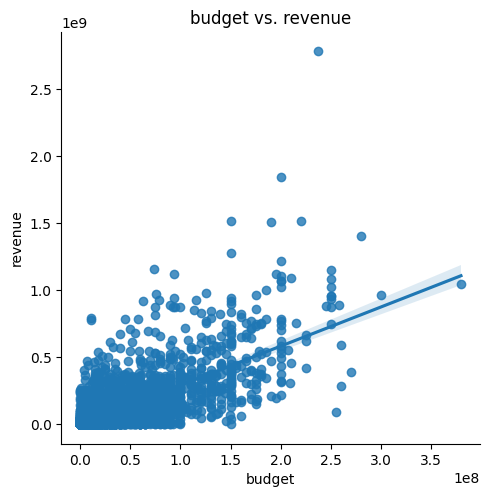

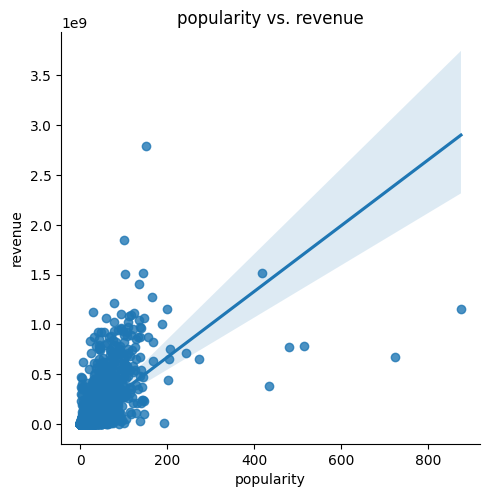

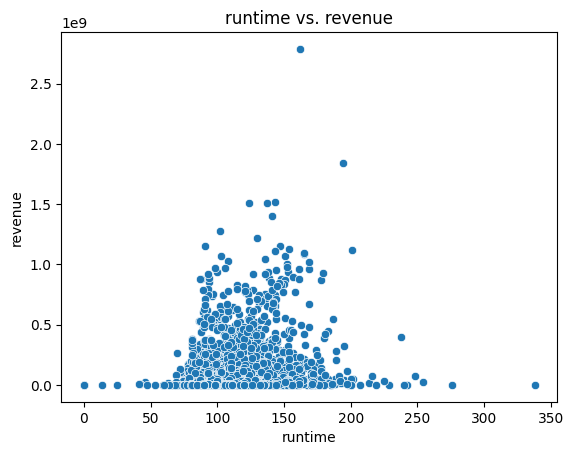

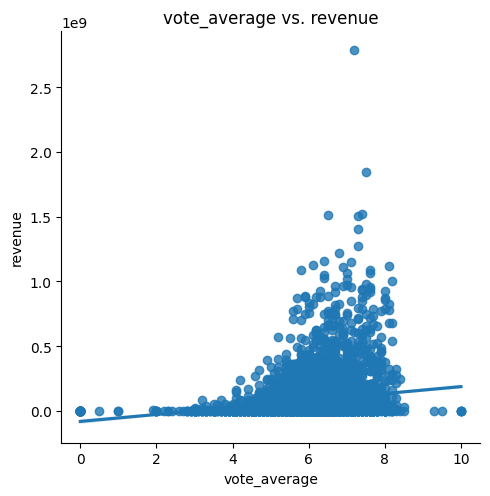

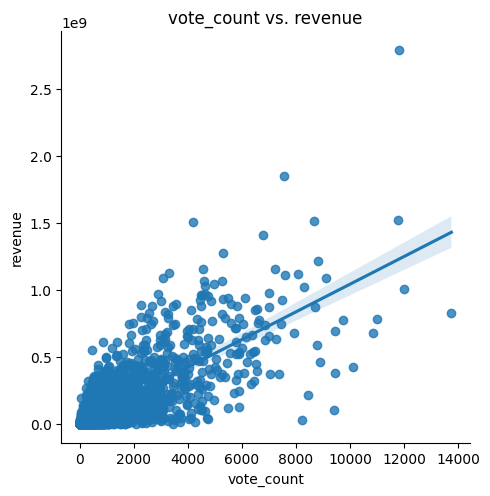

In [16]:
# find the feature that has biggest impact on revenue
sns.lmplot(data = movie, x = 'budget', y = 'revenue')
plt.title('budget vs. revenue')
plt.show()
sns.lmplot(data = movie, x = 'popularity', y = 'revenue')
plt.title('popularity vs. revenue')
plt.show()
sns.scatterplot(data = movie, x = 'runtime', y = 'revenue')
plt.title('runtime vs. revenue')
plt.show()
sns.lmplot(data = movie, x = 'vote_average', y = 'revenue')
plt.title('vote_average vs. revenue')
plt.show()
sns.lmplot(data = movie, x = 'vote_count', y = 'revenue')
plt.title('vote_count vs. revenue')
plt.show()

clearly, budget has a straight impact to revenue, and vote_count has some impact on revenue, the best runtime is between 50 to 200 minutes, best vote_average is between 6-8, other than that is not useful.

# Find Suitable Classifier

In this step we find a classifier that predict with the highest accurecy for later use.

## Training Data in Different Classifier

The selected raining classifiers are SGD, DecisionTree, GaussianNB, RandomForest, GradientBoosting, KNeighbors, and SVC.

In [17]:
# find suitable classifier
ori_train_set, ori_test_set = train_test_split(df_movie_prepared, test_size=0.1, random_state=42)
ori_movie = ori_train_set.drop('remainder__revenue',axis=1)
ori_movie_label = ori_train_set['remainder__revenue'].copy()
ori_test_movie = ori_test_set.drop('remainder__revenue',axis=1)
ori_test_movie_label = ori_test_set['remainder__revenue'].copy()

from sklearn.linear_model import LinearRegression

num_features = ['num__budget', 'num__popularity','num__runtime','num__vote_average','num__vote_count','num__original_language','remainder__Action','remainder__Adventure',
                'remainder__Animation','remainder__Comedy','remainder__Crime','remainder__Documentary','remainder__Drama','remainder__Family','remainder__Fantasy',
                'remainder__Fiction','remainder__Foreign','remainder__History','remainder__Horror',
                'remainder__Music','remainder__Mystery','remainder__Romance','remainder__Science','remainder__TV','remainder__Thriller','remainder__War','remainder__Western']
cat_features = []

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)])

ori_movie_prepared = preprocessing.fit_transform(ori_movie)

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(ori_movie, ori_movie_label)
movie_predictions = lin_reg.predict(ori_test_movie)


from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(ori_test_movie_label, movie_predictions, squared=False)
lin_rmse

0.39683741622028945

In [18]:
lin_rmses = -cross_val_score(lin_reg, 
                             ori_movie,ori_movie_label,
                             scoring="neg_root_mean_squared_error", 
                             cv=10)
lin_rmses.mean()

0.40731728803086764

In [19]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(ori_movie, ori_movie_label)

sgd_accury = cross_val_score(sgd_clf, 
                             ori_test_movie,ori_test_movie_label,
                             scoring="accuracy", 
                             cv=10)
sgd_accury.mean()

0.8064200680272109

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(ori_movie, ori_movie_label)
dt_accury = cross_val_score(dt_clf, 
                             ori_test_movie,ori_test_movie_label,
                             scoring="accuracy", 
                             cv=10)
dt_accury.mean()

0.8086309523809524

In [21]:
from sklearn.naive_bayes import GaussianNB
GNB=GaussianNB()
GNB.fit(ori_movie, ori_movie_label)
GNB_accury = cross_val_score(GNB, 
                             ori_test_movie,ori_test_movie_label,
                             scoring="accuracy", 
                             cv=10)
GNB_accury.mean()

0.5634778911564626

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(ori_movie, ori_movie_label)
rfc_accury = cross_val_score(rfc, 
                             ori_test_movie,ori_test_movie_label,
                             scoring="accuracy", 
                             cv=10)
rfc_accury.mean()

0.8667942176870749

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(ori_movie, ori_movie_label)
GBC_accury = cross_val_score(GBC, 
                             ori_test_movie,ori_test_movie_label,
                             scoring="accuracy", 
                             cv=10)
GBC_accury.mean()


0.8521683673469388

In [24]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(ori_movie, ori_movie_label)
KNN_accury = cross_val_score(KNN, 
                             ori_test_movie,ori_test_movie_label,
                             scoring="accuracy", 
                             cv=10)
KNN_accury.mean()


0.8250850340136054

In [25]:
from sklearn.svm import SVC
clf=SVC()
clf.fit(ori_movie, ori_movie_label)
SVC_accury = cross_val_score(clf, 
                             ori_test_movie,ori_test_movie_label,
                             scoring="accuracy", 
                             cv=10)
SVC_accury.mean()


0.8688350340136054

Once we completed the preparation of our dataset, we moved on to the next stage of the project. 
In this stage, we imported various classifiers, including SGDClassifier, DecisionTreeClassifier, GaussianNB, RandomForestClassifier, GradientBoostingClassifier, KNeighborsClassifier, and SVM. 
We then observed the performance of these classifiers in handling the data. Cross_val_score was using to get the accurary of each classifers' prediction, and then using mean to get mean accuracy
which can help us to evaluate the performance of the classifiers easily.

## Show The Result of Each Classifier

The accuracy of each classifier are ploted as following graph.

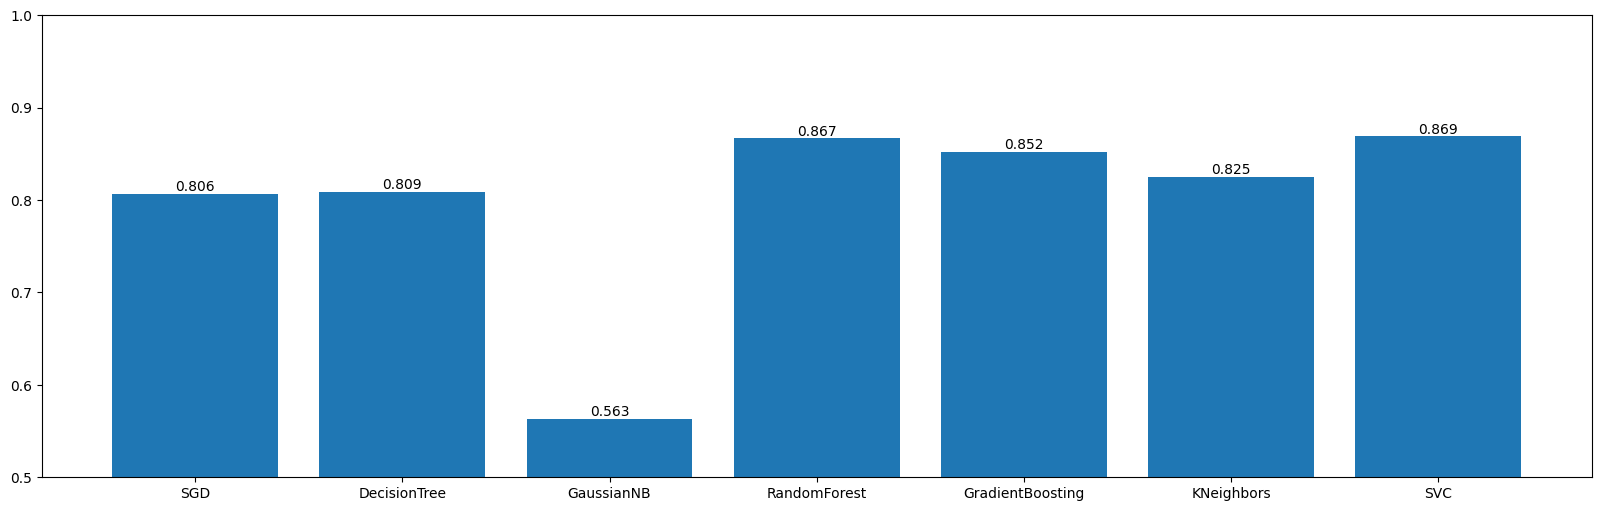

In [26]:
x=['SGD','DecisionTree','GaussianNB','RandomForest','GradientBoosting','KNeighbors','SVC']
y=[sgd_accury.mean(),dt_accury.mean(),GNB_accury.mean(),rfc_accury.mean(),GBC_accury.mean(),KNN_accury.mean(),SVC_accury.mean()]

plt.figure(figsize=(20,6))
plt.bar(x,y)
plt.ylim(0.5,1)
for i,v in enumerate(y):
    plt.text(i,v,'{:.3f}'.format(v),ha="center",va='bottom')
plt.show()

During the continuous training process of the model, we have observed an interesting phenomenon. Among all the classifiers, SVM (Support Vector Machine) and Random Forest Classifier consistently achieve the highest accuracy in predicting the dataset. Furthermore, compared to Random Forest, SVM demonstrates greater stability and maintains a consistent average accuracy(Accuracy=0.869). RandomForest can get very high accurary sometimes, even higher than SVM's accuracy(Accuracy around 0.89). However, in our perspective, having a stable accuracy alongside high accuracy is considered more important. Therefore, we have decided to conduct further research specifically focused on SVM.


In [27]:
#FIRST LETS TEST SVM WITH DIFFERENT GAMMAS IN RBF KERNEL
accuracy_score_list4=[]
svc=SVC(kernel='rbf', gamma=0.1) 
svc.fit(ori_movie, ori_movie_label)
accuracy_score_list4.append(svc.score(ori_test_movie,ori_test_movie_label))

svc=SVC(kernel='rbf', gamma=1) 
svc.fit(ori_movie, ori_movie_label)
accuracy_score_list4.append(svc.score(ori_test_movie,ori_test_movie_label))

svc=SVC(kernel='rbf', gamma=10) 
svc.fit(ori_movie, ori_movie_label)
accuracy_score_list4.append(svc.score(ori_test_movie,ori_test_movie_label))

svc=SVC(kernel='rbf', gamma=100) 
svc.fit(ori_movie, ori_movie_label)
accuracy_score_list4.append(svc.score(ori_test_movie,ori_test_movie_label))
accuracy_score_list4

[0.8731808731808732, 0.841995841995842, 0.6777546777546778, 0.5634095634095634]

Firstly, we will focus on gamma. As we all known, gamma is an important hyperparameter in the Support Vector Machine (SVM) algorithm that controls the flexibility of the model's decision boundary. When the gamma value is large, the decision boundary focuses more on each individual data point, resulting in a higher degree of fitting to the training set. On the other hand, when the gamma value is small, the decision boundary tends to be flatter, and distant data points also have an influence on the decision boundary. Such a model is more generalized and may exhibit better performance. Therefore, we have utilized the default kernel (RBF) for SVM but experimented with different gamma values to observe their impact on the model's performance on our dataset.
As we can see from the accuracy_score_list4 above, the larger gamma will decrease the accurarcy, which means there is a negative correlation between the gamma value and the accuracy of data prediction. When the gamma value is becoming larger, the decision boundary pays more attention to each individual sample, resulting in a higher degree of fitting to the training set and that might be the reason for the poorer performance on unseen data

In [28]:
#NOW, LETS EXPERIMENT SVM WITH DIFFERENT KERNEL AND C 
accuracy_score_list=[]
svc=SVC(C=0.01) 
svc.fit(ori_movie, ori_movie_label)
accuracy_score_list.append(svc.score(ori_test_movie,ori_test_movie_label))

svc=SVC(C=1.0) 
svc.fit(ori_movie, ori_movie_label)
accuracy_score_list.append(svc.score(ori_test_movie,ori_test_movie_label))

svc=SVC(C=100.0) 
svc.fit(ori_movie, ori_movie_label)
accuracy_score_list.append(svc.score(ori_test_movie,ori_test_movie_label))

svc=SVC(C=1000.0) 
svc.fit(ori_movie, ori_movie_label)
accuracy_score_list.append(svc.score(ori_test_movie,ori_test_movie_label))
accuracy_score_list

[0.8503118503118503,
 0.8731808731808732,
 0.8544698544698545,
 0.8336798336798337]

After completing the research on gamma, we then shifted our focus to other hyperparameters, such as the kernel type and C value. As mentioned in lecture, C is a hyperparameter used to control the penalty term in the SVM model. It determines the tolerance for misclassifications during the training process. A larger C value reduces the tolerance for classification errors, resulting in a potentially more complex decision boundary that focuses more on correctly classifying each training sample. On the other hand, a smaller C value increases the tolerance for classification errors, leading to a simpler decision boundary that can accommodate more misclassified points in the training set. Also, different kernel functions have different characteristics and may exhibit different performance when faced with the same dataset.

In [29]:
accuracy_score_list1=[]
svc=SVC(kernel='linear',C=0.01) 
svc.fit(ori_movie, ori_movie_label)
accuracy_score_list1.append(svc.score(ori_test_movie,ori_test_movie_label))

svc=SVC(kernel='linear',C=1.0) 
svc.fit(ori_movie, ori_movie_label)
accuracy_score_list1.append(svc.score(ori_test_movie,ori_test_movie_label))

svc=SVC(kernel='linear',C=100.0) 
svc.fit(ori_movie, ori_movie_label)
accuracy_score_list1.append(svc.score(ori_test_movie,ori_test_movie_label))

svc=SVC(kernel='linear',C=1000.0) 
svc.fit(ori_movie, ori_movie_label)
accuracy_score_list1.append(svc.score(ori_test_movie,ori_test_movie_label))

accuracy_score_list1

[0.8669438669438669,
 0.8731808731808732,
 0.8731808731808732,
 0.8731808731808732]

In [30]:
accuracy_score_list2=[]
svc=SVC(kernel='poly',C=0.01) 
svc.fit(ori_movie, ori_movie_label)
accuracy_score_list2.append(svc.score(ori_test_movie,ori_test_movie_label))

svc=SVC(kernel='poly',C=1.0) 
svc.fit(ori_movie, ori_movie_label)
accuracy_score_list2.append(svc.score(ori_test_movie,ori_test_movie_label))

svc=SVC(kernel='poly',C=100.0) 
svc.fit(ori_movie, ori_movie_label)
accuracy_score_list2.append(svc.score(ori_test_movie,ori_test_movie_label))

svc=SVC(kernel='poly',C=1000.0) 
svc.fit(ori_movie, ori_movie_label)
accuracy_score_list2.append(svc.score(ori_test_movie,ori_test_movie_label))

accuracy_score_list2

[0.6403326403326404, 0.8669438669438669, 0.83991683991684, 0.8191268191268192]

In [31]:
accuracy_score_list3=[]
svc=SVC(kernel='sigmoid',C=0.01) 
svc.fit(ori_movie, ori_movie_label)
accuracy_score_list3.append(svc.score(ori_test_movie,ori_test_movie_label))

svc=SVC(kernel='sigmoid',C=1.0) 
svc.fit(ori_movie, ori_movie_label)
accuracy_score_list3.append(svc.score(ori_test_movie,ori_test_movie_label))

svc=SVC(kernel='sigmoid',C=100.0) 
svc.fit(ori_movie, ori_movie_label)
accuracy_score_list3.append(svc.score(ori_test_movie,ori_test_movie_label))

svc=SVC(kernel='sigmoid',C=1000.0) 
svc.fit(ori_movie, ori_movie_label)
accuracy_score_list3.append(svc.score(ori_test_movie,ori_test_movie_label))

accuracy_score_list3

[0.8482328482328483,
 0.7941787941787942,
 0.7941787941787942,
 0.7983367983367984]

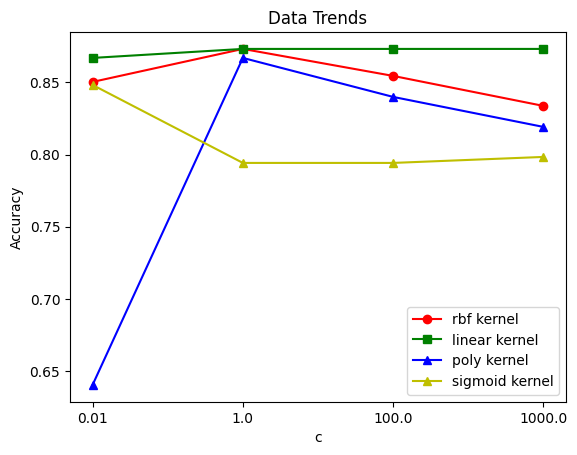

In [32]:
labels = ['0.01', '1.0', '100.0', '1000.0']
plt.plot(labels, accuracy_score_list, marker='o', color='r', label='rbf kernel')
plt.plot(labels, accuracy_score_list1, marker='s', color='g', label='linear kernel')
plt.plot(labels, accuracy_score_list2, marker='^', color='b', label='poly kernel')
plt.plot(labels, accuracy_score_list3, marker='^', color='y', label='sigmoid kernel')
plt.legend()
plt.title('Data Trends')
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.show()

During this process, we conducted separate tests with different kernel functions such as linear, polynomial, and others. For each kernel function, I set four different penalty factors C (0.1, 1, 100, 1000) to observe how their variations affect the prediction accuracy. We then plotted these four sets of data on a line graph to better observe the trends and patterns, allowing us to make comparison, make hypotheses and draw conclusions regarding the corresponding results
From the above graph, we can gather some information. Firstly, the green line shows a higher and more stable trend compared to the other three lines. For the linear kernel, changing the penalty factor (C) has a minimal impact on the prediction results. Furthermore, except for the sigmoid kernel, most of the functions show an increase in prediction accuracy when C increases from 0.1 to 1000. However, the sigmoid function exhibits the opposite trend, with a slight decrease followed by a slight increase within the range of 0.1 to 1. Thirdly, the best-performing function, the linear kernel, maintains a constant accuracy after reaching a certain value of C(1).


Confusion matrix

 [[218  31]
 [ 35 197]]

True Positives(TP) =  218

True Negatives(TN) =  197

False Positives(FP) =  31

False Negatives(FN) =  35


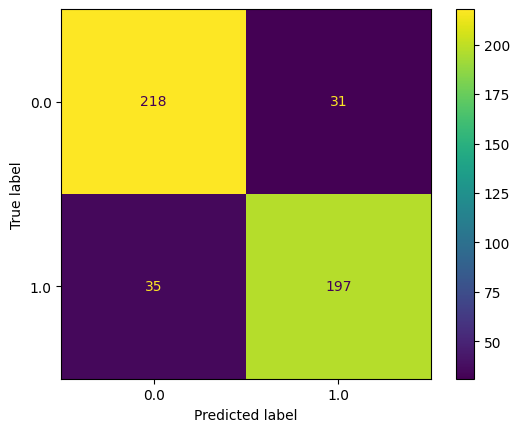

Classification accuracy : 0.8628
Classification error : 0.1372
Precision : 0.8755
Recall or Sensitivity : 0.8617
True Positive Rate : 0.8617
False Positive Rate : 0.1360
Specificity : 0.8640


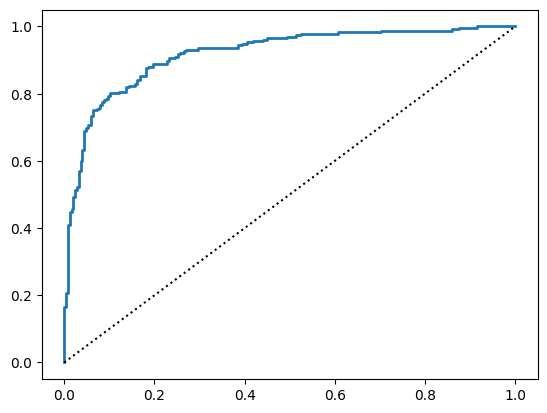

In [38]:
svc=SVC(kernel='linear',C=100,gamma=0.1) 
svc.fit(ori_movie, ori_movie_label)

y_train_pred = cross_val_predict(svc,ori_test_movie,ori_test_movie_label,cv=10)
cm = confusion_matrix(ori_test_movie_label,y_train_pred)
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
ConfusionMatrixDisplay.from_predictions(ori_test_movie_label,y_train_pred)
plt.show()
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))
y_scores = cross_val_predict(svc,ori_test_movie,ori_test_movie_label, 
                             cv=3, method="decision_function")
fpr, tpr, thresholds = roc_curve(ori_test_movie_label,y_scores)
# plot the roc curve
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.show()


After testing, in order to get a clear picture of classification model performance and the types of errors produced by the model, we used confusion matrix to summarize the performance of our final model( SVM based on linear kernel with C=1.0 and gamma=0.1) and then got four types of outcomes:
True Positives(TP) =  218

True Negatives(TN) =  196

False Positives(FP) =  31

False Negatives(FN) =  36

Last but not least, ROC curve was used to measure the classification model performance visually and that can give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels.

# Results and Conclusion

In wrapping up our project on predicting box office revenue, it's important to summarize the key findings we've arrived at, aligned with the three main goals we set out to achieve.

Our first goal was to determine which feature exhibits the most significant correlation with the data. The analysis revealed that the 'budget' stood as the strongest predictor of movie revenue. This underscores the critical role of financial investment in driving a film's commercial success.

The second objective was to identify the most suitable classifier for our model. In our exploration, we found the Support Vector Machine (SVM) to be the optimal choice. Notably, while the RandomForest classifier occasionally outperformed SVM in terms of accuracy, it exhibited considerable variability, thereby making SVM a more reliable and stable option for our predictive model.

Finally, we sought to enhance the accuracy of our selected classifier through hyperparameter tuning. Through this optimization process, we discovered that utilizing a linear kernel in the SVM classifier and setting the penalty parameter C in the range of 1 to 1000 yielded the highest accuracy score of 0.8628.

These findings represent significant steps towards understanding the factors influencing box office success and developing an effective model for predicting revenue. The insights will be invaluable in guiding decision-making processes in the film industry and may contribute towards more profitable outcomes in future projects.